In [1]:
import numpy as np
import numpy.random as npr

import matplotlib.pyplot as plt
import multiprocessing
NumThread=(multiprocessing.cpu_count()-1)*2 # sets number of workers based on cpus on current machine
print('Parallel processing with '+str(NumThread)+' cores')
# fix random seed
npr.seed(42)
# import time 


# from util_factorial_hmm import gibbs

%load_ext autoreload
%autoreload 2
from new_utils_modelsel import *
from new_model_fitting_utility_functions import *

save_fig_folder='MODEL/'
# if save_fig_folder does not exist, create it
if not os.path.exists(save_fig_folder):
    os.makedirs(save_fig_folder)
    


import matplotlib as mpl
LETTER_WIDTH = 8.5  # inches
FIG_WIDTH_1_3 = LETTER_WIDTH / 3
FIG_WIDTH_2_3 = 2 * LETTER_WIDTH / 3
FIG_WIDTH_3_3 = LETTER_WIDTH
FIG_HEIGHT = 6

# Neuron‐style global rcParams
FNTSZ = 12
mpl.rcParams.update({
    'font.size':         FNTSZ,
    'axes.titlesize':    FNTSZ,
    'axes.labelsize':    FNTSZ,
    'xtick.labelsize':   FNTSZ,
    'ytick.labelsize':   FNTSZ,
    'legend.fontsize':   FNTSZ,
    'figure.titlesize':  FNTSZ
})
# if not os.path.exists('data/'):
#     os.makedirs('data/')

CORR_CMAP       = 'viridis'
EMISSION_CMAP   = 'plasma'
MACRO_AREA_CMAP = sns.color_palette('tab20', n_colors=20)

Parallel processing with 126 cores


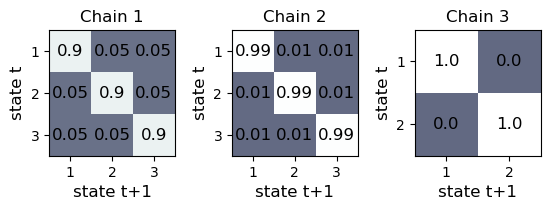

In [2]:
#–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
# Neuron‐ready plotting cell, using plot_fHMM_model
#–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

import numpy as np
import matplotlib.pyplot as plt

from new_model_fitting_utility_functions import generate_fHMM_data
from new_utils_modelsel import plot_fHMM_model

# 2. Synthetic data parameters
num_states    = [3, 3, 2]
num_factors   = len(num_states)
emission_dim  = 100
num_timesteps = 10000
frame_rate    = 1.0    # Hz

# build a simple decreasing trans_diag
trans_diag = [0 for i in range(num_factors)]
for i in range(num_factors):
        if i < np.min([4,num_factors]):
            epsi = 10 ** (-i - 1)
        trans_diag[i] = (1 - epsi)
        
# 3. Generate ground‐truth fHMM
fHMM_model = generate_fHMM_data(
    n_factors    = num_factors,
    n_states     = num_states,
    emission_dim = emission_dim,
    n_timesteps  = num_timesteps,
    trans_diag   = trans_diag,
    rand_seed    = 42,
    selectivity  = 'mixedsel',
    mean_scalar  = 1
)

# 4. Plot with the shared utility
#    plot_fHMM_model will produce a 2/3-letter-width panel,
#    with all font sizes at 20 and consistent colorbars.
start_sec = 1000.0
end_sec   = 1301.0
start_t   = int(start_sec * frame_rate)
end_t     = int(end_sec   * frame_rate)

# This will create the figure and axes, set fonts to 20, etc.
plot_fHMM_model(
    fHMM_model = fHMM_model,
    lower      = start_t,
    upper      = end_t,
    tickspace  = 20
)

# Now save to disk as a Neuron-ready PDF
plt.savefig(f"{save_fig_folder}fHMM_timecourses.pdf",
            format='pdf', bbox_inches='tight')
plt.close()

# plt.figure(figsize=(10, 15))
# for i in range(num_factors):
#     ax = plt.subplot(1, num_factors, i+1)
#     plot_trans_matrix(transition_matrices[i])
#     # write values on the diagonal as exponential in base 10
#     ax.set_title(f"Factor {i+1}")
# plt.savefig(save_fig_folder+'tpm.pdf')
# plt.close()

# how many factors / panels?
transition_matrices = fHMM_model['params']['transition_matrices']
num_factors = len(transition_matrices)


# state_factors = []  # Track the factor each state belongs to
# ... rest of function ...

# --- Transition matrix plot (MODIFIED as per instructions) ---
# Instead of plt.figure(figsize=(10, 15)), use plt.figure(figsize=(FIG2_3, FIG1_3))
# When setting each subplot title, set fontsize=fntsz
plt.figure(figsize=(FIG_WIDTH_2_3, FIG_WIDTH_2_3))
for i in range(num_factors):
    ax = plt.subplot(1, num_factors, i+1)
    plot_trans_matrix(transition_matrices[i])
    ax.set_title(f"Chain {i+1}", fontsize=FNTSZ)
plt.tight_layout()
plt.savefig(save_fig_folder+'tpm.pdf')


In [3]:
emissions_data=fHMM_model['fHMM_data']['emissions']

MAX_runs=20
n_components = np.arange(1, np.min([emissions_data.shape[1],MAX_runs]), 1)  # options for n_components
file_save=save_fig_folder+'synth_ModelSel_ICA'
ica,optimal_n_components,n_factors_range,average_variances=model_sel_ICA(emissions_data,MAX_runs=MAX_runs,file_save=file_save,method='elbow')
factors=ica.transform(emissions_data)
# plateau_idx = find_plateau_point(average_variances, start_monitor=10, window=5, patience=5)
# print(plateau_idx)
# num_factors_FA=factors.shape[1]


/home/luca/miniconda3/envs/fhmm_luca/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/luca/miniconda3/envs/fhmm_luca/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/luca/miniconda3/envs/fhmm_luca/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/luca/miniconda3/envs/fhmm_luca/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/luca/miniconda3/envs/fhmm_luca/lib/python3.9/site-packages

Optimal number of components based on the elbow: 5


In [4]:


"""
COMPARE TO PCA,FA modelsel with max likelihood
"""
MAX_runs=20
file_save=save_fig_folder+'synth_ModelSel_FA_PCA'
n_components = np.arange(1, np.min([emissions_data.shape[1],MAX_runs]), 1)  # options for n_components
pca_scores, fa_scores, tested_n_pca, tested_n_fa, best_n_pca, best_n_fa = compute_scores_pca_fa(emissions_data,n_components,method='elbow',patience=5)
# n_components_pca = n_components[np.argmax(pca_scores)]
# n_components_fa = n_components[np.argmax(fa_scores)]
# n_components_pca = find_plateau_point(pca_scores)
# n_components_fa = find_plateau_point(fa_scores)
n_components_ica = optimal_n_components
print(f"best n_components by PCA CV = {best_n_pca}, FA CV = {best_n_fa}, ICA CV = {n_components_ica}")

## PLOT PCA FA
file_save1 = file_save + '.pdf'
fig, ax = plt.subplots(figsize=(FIG_WIDTH_1_3, FIG_WIDTH_1_3))

# Plot PCA & FA CV scores
ax.plot(tested_n_pca, pca_scores, color='C0', lw=2, label="PCA CV")
ax.plot(tested_n_fa,   fa_scores,   color='C1', lw=2, label="FA CV")

# Vertical lines at chosen optima
ax.axvline(best_n_pca, color='C0', ls='--', lw=2, label=f"PCA⊕={best_n_pca}")
ax.axvline(best_n_fa,  color='C1', ls='--', lw=2, label=f"FA⊕={best_n_fa}")

# Labels and title
ax.set_xlabel("Number of components", fontsize=FNTSZ)
ax.set_ylabel("Cross‐validated score", fontsize=FNTSZ)
ax.set_title("Model selection (CV scores)", fontsize=FNTSZ)

# Legend with large font
leg = ax.legend(loc="lower right", fontsize=FNTSZ)
for txt in leg.get_texts():
    txt.set_fontsize(FNTSZ)

# Reduce xticks to just the min/max of both lists
all_n = tested_n_pca + tested_n_fa
xmin, xmax = min(all_n), max(all_n)
ax.set_xticks([xmin, xmax])
ax.set_xticklabels([str(xmin), str(xmax)], fontsize=FNTSZ)

# Tick label size
ax.tick_params(axis='both', which='major', labelsize=FNTSZ)

# Tight layout
plt.tight_layout(pad=1.0)

# Save
fig.savefig(file_save1, format="pdf", dpi=300)
plt.close(fig)

"""
TIMESCALES
"""
file_timescale=save_fig_folder+'synth_ICA_'

timescales,labels,optimal_n_timescales=infer_timescales(factors,file_save=file_timescale)

"""
HMM on ICA components
"""

# option='GMM' # this takes 10s, it works great with simulated data, not as much with real data.
# option='HMM' # this takes 3m.
file_save=save_fig_folder+'synth_Fit2FactorsSelection'
results_HMM, n_states_best_HMM = fit2sources_findNumStates(factors,'HMM',file_save)
# results_GMM, n_states_best_GMM = fit2sources_findNumStates(factors,'GMM',file_save)

n_states_best_dict_HMM = {'line method': n_states_best_HMM}
print(f'best number of states by each method for HMM case: \n \
original method   : {n_states_best_dict_HMM["line method"]}')

dict = {'save_session':'synth','ica':ica,'factors':factors,'timescales':timescales,'n_states_best_dict_HMM':n_states_best_dict_HMM,'results_HMM':results_HMM}
file_beh=save_fig_folder+'synth_ICA_HMM_modelsel1.npy'
np.save(file_beh,dict)

best n_components by PCA CV = 5, FA CV = 5, ICA CV = 5


LP: 5325.1:  45%|████▌     | 225/500 [00:02<00:02, 98.79it/s]]

3
[-1.540999391273769, -0.6980910237182822, 0.2254915781615742, 0.2256823929261305, 0.28999340501329074, 0.29788041110253016, 0.25104554932393314, 0.29795528615207073, 0.2974842306559229]


LP: 1177.0:  56%|█████▌    | 281/500 [00:02<00:01, 115.08it/s]

2
[-1.4747699354901025, 0.6284559549226364, 0.628455954919637, 0.6284559549166375, 0.6284559549136381, 0.799288368529098, 0.7965336302254609, 0.7959867364349852, 0.7876624721568226]


LP: 1178.8:  85%|████████▌ | 425/500 [00:03<00:00, 115.55it/s]

2
[-1.4396073272627945, 0.15480103859472194, 0.17600141670674133, 0.17584671288177411, 0.44771077263153664, 0.17588919609978212, 0.48959831945626503, 0.5150143997437803, 0.16933421779588084]


LP: 1170.4:  20%|██        | 102/500 [00:00<00:03, 130.99it/s]

3
[-1.400209201518657, -0.27486564242983713, 0.21521666762100347, 0.2272070349086569, -0.2630000845160824, 0.2333868368642471, 0.21402376606804296, 0.2578822335552614, 0.2572099922134294]


LP: 1234.5: 100%|██████████| 500/500 [00:05<00:00, 98.50it/s] 


3
[-1.4404954918572923, -0.2937335157543987, 0.17852714463071387, 0.17851353071808088, 0.1764933686410781, 0.1759318668441732, 0.17707841648656522, 0.17119563231593915, 0.17198574222873064]
best number of states by each method for HMM case: 
 original method   : [3, 3, 2, 3, 2]


In [5]:
file_save=save_fig_folder+'synth_ICA_HMM_modelsel1.npy'
dict_load = npy_to_dict(file_save)

factors = dict_load['factors']
# timescales = dict_load['timescales']
n_states_best_dict_HMM = dict_load['n_states_best_dict_HMM']
save_session = dict_load['save_session']
ica = dict_load['ica']
# results_HMM = dict_load['results_HMM']
n_states_best_HMM = n_states_best_dict_HMM['line method']

file_save=save_fig_folder+'synth_SampleFit'
hmm_fits_HMM = fit_hmm_after_gmm(factors, n_states_best_HMM, timescales=None,file_save=file_save)



Converged to LP: -2770.2:   2%|▏         | 19/1000 [00:00<00:05, 168.54it/s]


In [6]:
file_duplicate=save_fig_folder+'synth_remove_duplicate_hmms'
data_factors_to_keep_HMM, new_corr_matrix_HMM, data_factors_HMM = \
remove_duplicate_hmms(hmm_fits_HMM,threshold=0.8,threshold_low=0.8,threshold_hi=0.3,file_save=file_duplicate)

correlation_matrix_HMM = new_corr_matrix_HMM
file_dendro=save_fig_folder+'synth'
# id_communities_HMM, mean_corr_communities_HMM, data_factors_to_keep_filtered_HMM=cluster_hmm(correlation_matrix_HMM, data_factors_to_keep_HMM,file_save=file_dendro)
id_communities_HMM, mean_corr_communities_HMM, data_factors_to_keep_filtered_HMM=cluster_hmm(correlation_matrix_HMM, data_factors_to_keep_HMM,file_save=file_dendro,threshold_choice=None)

n_states_best_dict_HMM['used'] =  n_states_best_HMM

means_rec_HMM, posteriors_rec_HMM, transitions_rec_HMM, init_rec_HMM = reconstruct_parameters(id_communities_HMM, data_factors_to_keep_filtered_HMM, ica)

dict_save = {'n_states_best_dict_HMM':n_states_best_dict_HMM,'means_rec_HMM':means_rec_HMM,'posteriors_rec_HMM':posteriors_rec_HMM,'transitions_rec_HMM':transitions_rec_HMM,'init_rec_HMM':init_rec_HMM}
file_save=save_fig_folder+'synth_HMM_reconstruction.npy'
np.save(file_save,dict_save)


data_plot = {'params':fHMM_model['params'],'true_states':fHMM_model['fHMM_data']['true_states']}
file_name=save_fig_folder+'ModelSelGroundTruthCompare'
compare_reconstructed_true(means_rec_HMM,posteriors_rec_HMM,data_plot,file_name)


# Correlation of reconstructed posteriors — Neuron‐ready 1/3-width heatmap
corr_matrix = np.corrcoef(np.hstack(posteriors_rec_HMM).T)
np.fill_diagonal(corr_matrix, np.nan)

# 1/3 of a letter width ≈ 2.4 inches (assuming 7.2" full width)
fig, ax = plt.subplots(figsize=(FIG_WIDTH_1_3, FIG_WIDTH_1_3))

# Plot
sns.heatmap(
    corr_matrix,
    ax=ax,
    vmin=-1, vmax=1,
    cmap='coolwarm',
    center=0,
    square=True,
    cbar_kws={
        'shrink': 0.75,
        'pad': 0.02,
        'label': 'Correlation'
    }
)

# Build labels "(factor,state)"
labels_hmm = [
    f'({f},{s})'
    for f in range(len(posteriors_rec_HMM))
    for s in range(posteriors_rec_HMM[f].shape[1])
]

# Ticks every other label to avoid crowding
n = len(labels_hmm)
ax.set_xticks(np.arange(n) + 0.5)
ax.set_yticks(np.arange(n) + 0.5)
ax.set_xticklabels(labels_hmm, fontsize=FNTSZ, rotation=90)
ax.set_yticklabels(labels_hmm, fontsize=FNTSZ, rotation=0)

# Only show first and last tick if still crowded
if n > 20:
    ax.set_xticks([0.5, n - 0.5])
    ax.set_xticklabels([labels_hmm[0], labels_hmm[-1]], fontsize=FNTSZ, rotation=90)
    ax.set_yticks([0.5, n - 0.5])
    ax.set_yticklabels([labels_hmm[0], labels_hmm[-1]], fontsize=FNTSZ, rotation=0)

# Title and colorbar styling
ax.set_title("Posterior Correlations", fontsize=FNTSZ, pad=10)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=FNTSZ)
cbar.set_label("Correlation", fontsize=FNTSZ)

# Remove spines, tighten
for spine in ax.spines.values():
    spine.set_visible(False)
ax.tick_params(length=0)

plt.tight_layout()
fig.savefig(save_fig_folder + 'synth_posteriors_init_corr.pdf', format='pdf', dpi=300)
plt.close(fig)

[{2, 7}, {9, 3}, {8, 4}, {10, 5}]
{0, 1, 2, 5, 6, 8, 9, 11, 12}
neg_correlated_groups: [{2, 6}, {11, 12}]
to_remove: [6]
to_remove: []
Selected features: [0, 1, 2, 5, 8, 9, 11, 12]


/home/evickers/fHMM/Luca_analysis/new_utils_modelsel.py:1247: RuntimeWarning: Mean of empty slice
  average = np.nanmean(matrix_copy)
/home/evickers/fHMM/Luca_analysis/new_utils_modelsel.py:1869: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{ytick-1:.2f}' for ytick in yticks], fontsize=FNTSZ)


Best match: ICA Factor 0 with True state 6 (Factor 2) with correlation 1.0
unmatched_factors [1, 2, 3, 4, 5, 6, 7]
Best match: ICA Factor 1 with True state 7 (Factor 2) with correlation 1.0
unmatched_factors [2, 3, 4, 5, 6, 7]
Best match: ICA Factor 6 with True state 4 (Factor 1) with correlation 1.0
unmatched_factors [2, 3, 4, 5, 7]
Best match: ICA Factor 3 with True state 0 (Factor 0) with correlation 0.9999999999999999
unmatched_factors [2, 4, 5, 7]
Best match: ICA Factor 7 with True state 5 (Factor 1) with correlation 0.999999899472611
unmatched_factors [2, 4, 5]
Best match: ICA Factor 5 with True state 3 (Factor 1) with correlation 0.999999872405053
unmatched_factors [2, 4]
Best match: ICA Factor 4 with True state 2 (Factor 0) with correlation 0.998466895893795
unmatched_factors [2]
Best match: ICA Factor 2 with True state 1 (Factor 0) with correlation 0.9981580917660395
unmatched_factors []
ICA Factor 0 is matched with True state 6 (Factor 2) with correlation 1.0
ICA Factor 1 is 

In [7]:
emissions_fa = emissions_data
sigmas = emissions_fa.std(axis=0)
file_beh=save_fig_folder+'synth_ICA_HMM_modelsel1.npy'
dict_ICA = npy_to_dict(file_beh)
file_save2=save_fig_folder+'synth_HMM_reconstruction.npy'
dict2 = npy_to_dict(file_save2)

instantiation_rec_dict = {
                              'means_hmm': dict2['means_rec_HMM'],
                              'posteriors_hmm': dict2['posteriors_rec_HMM'],
                              'transitions_hmm': dict2['transitions_rec_HMM'],
                              'initial_states_hmm': dict2['init_rec_HMM'],
                              'n_states_best_dict_hmm': dict2['n_states_best_dict_HMM'],
                              'n_states_results_hmm': dict_ICA['results_HMM'],
                              'variances': sigmas,
                              # 'emissions_ccf': dict1['emissions_ccf'], # only needed for CCF aggregated data
                              # 'emissions_pca': emissions_data, # only needed for the PCA case
                              'emissions_fa': emissions_fa,
                              # 'emissions': activity, # only needed for the raw data case
                              # 'df_behavior': dict1['df_behavior'],
                              #   'areas_list': areas_list,
                              # 'areas_fa': dict1['areas_list_fa'],
                              # 'areas_pca': areas_list_pca,
                              # 'activity': activity,
                              # 'units': dict1['df_units'],
                              # 'params': params, # Only needed for arameter recovery
                              # 'true_states': true_states, # Only needed for arameter recovery
                              # 'mapping_df' : dict1['mapping_df'], # Only needed for CCF aggregated data
                              # 'expec_emissions': expec_emissions, # Only needed for arameter recovery
                              # 'pca_dict' : pca_dict # Only needed for the PCA case
                              # 'fa_dict' : dict1['fa_dict'], # Only needed for the PCA case
                              # 'activity_df_fa': dict1['activity_df_fa']
                              # 'covariate_cols': covariate_cols
                              }

# instantiation_recs_dict_name = 'parameter_recovery_instantiation_recs_' + filename[:-4] + '_ccf_v0.npy'

instantiation_recs_dict_name=save_fig_folder+'synth_parameter_recovery_instantiation_recs.npy'
np.save(instantiation_recs_dict_name, instantiation_rec_dict)

In [8]:
pd.set_option("display.max_columns", None)
pd.set_option('display.expand_frame_repr', False)
np.set_printoptions(linewidth=1000)

from new_model_fitting_utility_functions import *
from DATA1_auxFun import *

"""
FOLDER MANAGEMENT
"""
# setup_logging(f"{save_fig_folder}MODEL_model_fitting_log")


"""
fHMM parameters
"""
n_runs = 8 # Number of independent runs of the algorithm for local maxima avoidance
# # Num iters set to 20 only for v3 run
n_gibbssampler = 2 # Number of times to /run gibbs sampling to convergence in the _gibbs_all_factors() function. usually converges at 2.
tolerance = 10**-4
# parallel = True # We don't have a parallel option in the current fitting script because not parallelizing would be highly inefficient.
n_em_iter = 200 # Number of times to run EM iteration
n_gibbs = 10 # number of independent runs of gibbs sampling to get posteriors as means 



instantiation_results = npy_to_dict(instantiation_recs_dict_name)

means_hmm = instantiation_results['means_hmm']
posteriors_hmm = instantiation_results['posteriors_hmm']
transitions_hmm = instantiation_results['transitions_hmm']
initial_states_hmm = instantiation_results['initial_states_hmm']
n_states_best_dict_hmm = instantiation_results['n_states_best_dict_hmm']
n_states_results_hmm = instantiation_results['n_states_results_hmm']
variances = instantiation_results['variances']
# emissions_ccf = instantiation_results['emissions_ccf'] 
emissions_fa = instantiation_results['emissions_fa'] 
# df_behavior = instantiation_results['df_behavior']
# units = instantiation_results['units']
# mapping_df = instantiation_results['mapping_df']

pre_estimated_params = {
          "initial_dist": (initial_states_hmm),  # List of lists converted to NumPy array
          "means": (means_hmm),  # Nested lists of arrays to 3D NumPy array
          "transition_matrices": (transitions_hmm),  # List of arrays to 3D NumPy array
          "variances": (variances), # Vector directly used
          "posteriors": (posteriors_hmm) 
}
n_factors, n_states = len(means_hmm), len(means_hmm[0])
emission_dim = emissions_fa.shape[1]
n_timesteps = emissions_fa.shape[0]

emissions = emissions_fa

InitSet = [pre_estimated_params]

for InitCond in InitSet:

          saveInit = 'RandomIC' if InitCond is None else 'PreEstIC'


          n_factors=len(means_hmm)
          emission_dim=len(means_hmm[0][0])
          n_states=[len(means_hmm[i]) for i in range(len(means_hmm))]


          hypers = {'n_factors' : n_factors,
                    'n_states' : n_states,
                    'emission_dim' : emission_dim}

          options = {'n_runs': n_runs,
                    'n_gibbs': n_gibbs,
                    'n_gibbssampler': n_gibbssampler,
                    'n_em_iter':n_em_iter,
                    'tolerance': tolerance,
                    'NumThread':NumThread,
                    'verbose':False}

          fit_dict = fit_fHMM(n_factors = n_factors, 
                              n_states = n_states, 
                              emissions = emissions, 
                              hypers = hypers,
                              options = options,
                              pre_estimated_params = InitCond)

          # save_results=save_fig_folder+saveInit+'fHMMFit/'
          # if not os.path.exists(save_results): os.makedirs(save_results)

          file_name=save_fig_folder+saveInit+'_fHMMFit.npy'
          np.save(file_name, fit_dict)

          """
          BEST RUN WITH LL
          """
          fit_best_run = find_best_run_LL(fit_dict)
          fit_best_run['emissions_fa'] = emissions_fa  

          # save_results=save_fig_folder+saveInit+'fHMMFit/'
          # if not os.path.exists(save_results): os.makedirs(save_results)

          file_name1=save_fig_folder+saveInit+'_fHMMFit_BestRunLL.npy'
          np.save(file_name1, fit_best_run)

          """
          BEST RUN WITH VAREXP
          """
          var_explained_runs = Var_Explained(fit_dict, emissions_fa)

          fit_best_run = find_best_run_VarExp(fit_dict,var_explained_runs)
          fit_best_run['emissions_fa'] = emissions_fa  

          # save_results=save_fig_folder+saveInit+'fHMMFit/'
          # if not os.path.exists(save_results): os.makedirs(save_results)

          file_name1=save_fig_folder+saveInit+'_fHMMFit_BestRunVarExp.npy'
          np.save(file_name1, fit_best_run)


Parallel processing with 126 cores


  0%|          | 0/200 [00:00<?, ?it/s]

Set expectations to pre_estimated_params values, skipping to m step
Set expectations to pre_estimated_params values, skipping to m step
Set expectations to pre_estimated_params values, skipping to m step
Set expectations to pre_estimated_params values, skipping to m step
Set expectations to pre_estimated_params values, skipping to m step
Set expectations to pre_estimated_params values, skipping to m step
Set expectations to pre_estimated_params values, skipping to m step
Set expectations to pre_estimated_params values, skipping to m step


  2%|▎         | 5/200 [00:26<17:40,  5.44s/it]

Convergence at EM iteration number 7 of 200


  3%|▎         | 6/200 [00:27<14:36,  4.52s/it]


Convergence at EM iteration number 7 of 200
Convergence at EM iteration number 7 of 200


  3%|▎         | 6/200 [00:29<16:05,  4.98s/it]

Convergence at EM iteration number 7 of 200


  3%|▎         | 6/200 [00:31<17:00,  5.26s/it]

Convergence at EM iteration number 7 of 200


  2%|▏         | 4/200 [00:34<27:53,  8.54s/it]

Convergence at EM iteration number 7 of 200


  3%|▎         | 6/200 [00:38<20:48,  6.44s/it]


Convergence at EM iteration number 7 of 200


  3%|▎         | 6/200 [00:42<18:44,  5.80s/it]

Convergence at EM iteration number 7 of 200


  3%|▎         | 6/200 [00:46<24:48,  7.67s/it]


[0, 0, 0, 0, 0, 0, 0, 0]
[478587.3522548677, 478579.6483952049, 478572.4468638983, 478580.1712632309, 478567.18262989674, 478581.47191778966, 478568.4208685705, 478570.23120990855]
Best iteration:0, best run:0
[0, 0, 0, 0, 0, 0, 0, 0]
[0.776773870870158, 0.7767379573737954, 0.7767443930991761, 0.7767607600620772, 0.7767418388557464, 0.7767565067272917, 0.7767822696725972, 0.7767573750090822]
Best iteration:6, best run:0


In [ ]:
from DATA1_auxFun import plot_fhmm_LL_overlay_convergence, plot_fhmm_VarExp_overlay_convergence
from new_utils_modelsel import compare_reconstructed_true_new
InitSet = [pre_estimated_params,None]
for InitCond in InitSet:

          saveInit = 'RandomIC' if InitCond is None else 'PreEstIC'

          file_name=save_fig_folder+saveInit+'_fHMMFit.npy'
          fit_dict=npy_to_dict(file_name)
          print(f"load file {file_name}")



          """
          VISUALIZE
          """
          var_explained_runs = Var_Explained(fit_dict, emissions_fa)
          file_save=save_fig_folder+saveInit+'synth_posterior_correlations_with_final_posterior.pdf'
          plot_fhmm_PosteriorCorrelationRuns(fit_dict,file_save)
          file_name=save_fig_folder+saveInit+'synth_LL_convergenceOverRuns.pdf'
          plot_fhmm_LL_convergenceOverRuns(fit_dict,file_name)
          file_name=save_fig_folder+saveInit+'synth_VarExpOverRuns.pdf'
          plot_fhmm_VarExp_convergenceOverRuns(var_explained_runs, file_name)

          file_name=save_fig_folder+saveInit+'synth_LL_convergence_overlay.pdf'
          plot_fhmm_LL_overlay_convergence(fit_dict, file_name)
          file_name=save_fig_folder+saveInit+'synth_VarExp_overlay.pdf'
          plot_fhmm_VarExp_overlay_convergence(var_explained_runs, file_name)

          # clear fit_dict variable from workspace
          del fit_dict

          file_name1=save_fig_folder+saveInit+'_fHMMFit_BestRunVarExp.npy'
          # file_name1=save_fig_folder+saveInit+'_fHMMFit_BestRunLL.npy'
          fit_best_run=npy_to_dict(file_name1)
          posteriors_rec_HMM=fit_best_run['posteriors']
          means_rec_HMM=fit_best_run['params']['means']
          trans_mat_rec_HMM=fit_best_run['params']['means']
          data_plot = {'params':fHMM_model['params'],'true_states':fHMM_model['fHMM_data']['true_states'],'hypers':fHMM_model['hypers']}
          file_name=save_fig_folder+saveInit+'GroundTruthCompare'
          # compare_reconstructed_true(means_rec_HMM,posteriors_rec_HMM,data_plot,file_name)
          compare_reconstructed_true_new(means_rec_HMM,posteriors_rec_HMM,data_plot,file_name, lower = start_t,upper = 2001,)


load file MODEL/PreEstIC_fHMMFit.npy


/home/luca/miniconda3/envs/fhmm_luca/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/luca/miniconda3/envs/fhmm_luca/lib/python3.9/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/luca/miniconda3/envs/fhmm_luca/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/luca/miniconda3/envs/fhmm_luca/lib/python3.9/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/luca/miniconda3/envs/fhmm_luca/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/luca/miniconda3/envs/fhmm_luca/lib/python3.9/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encount

load file MODEL/RandomIC_fHMMFit.npy


/home/luca/miniconda3/envs/fhmm_luca/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/luca/miniconda3/envs/fhmm_luca/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/luca/miniconda3/envs/fhmm_luca/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/luca/miniconda3/envs/fhmm_luca/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/luca/miniconda3/envs/fhmm_luca/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
